In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/Jupyter Notebook/Disease_symptom_and_patient_profile_dataset.csv")

## Numerical Analysis

In [3]:
df.sample(5)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
206,Anemia,No,No,Yes,No,50,Male,Normal,Normal,Negative
213,Diabetes,No,Yes,No,No,50,Male,Normal,High,Negative
68,Pneumonia,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative
218,Kidney Disease,No,Yes,No,Yes,50,Male,Normal,Normal,Negative
28,Migraine,Yes,No,No,No,30,Female,Normal,Normal,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [6]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [7]:
df.shape

(349, 10)

In [8]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [9]:
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

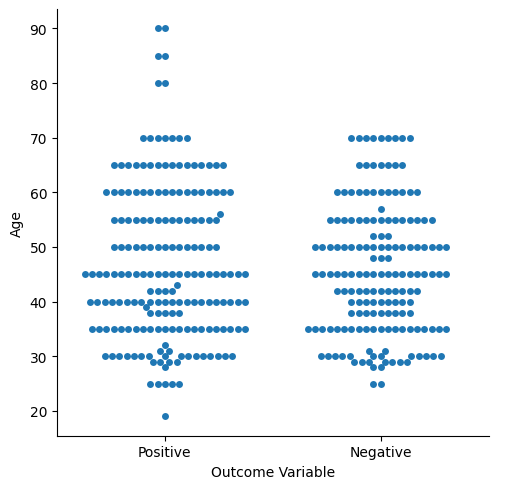

In [10]:
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df , kind = "swarm")    

### people in old ages have a higher probability of being tested positive for diseases which is an outlier for our dataset

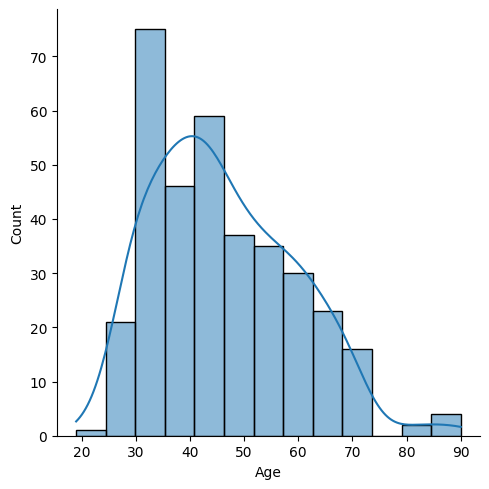

In [11]:
sns.displot(df['Age'] , kde=True)

### There is no major skewness in the dataset with a few outliers.

<Axes: >

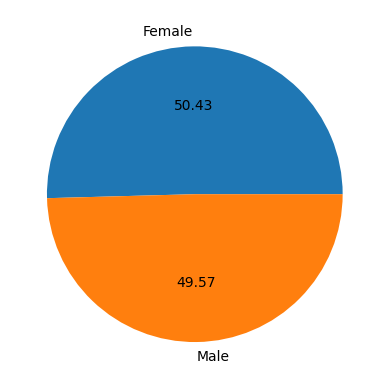

In [14]:
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

### The dataset is quite evenly distributed based on gender.

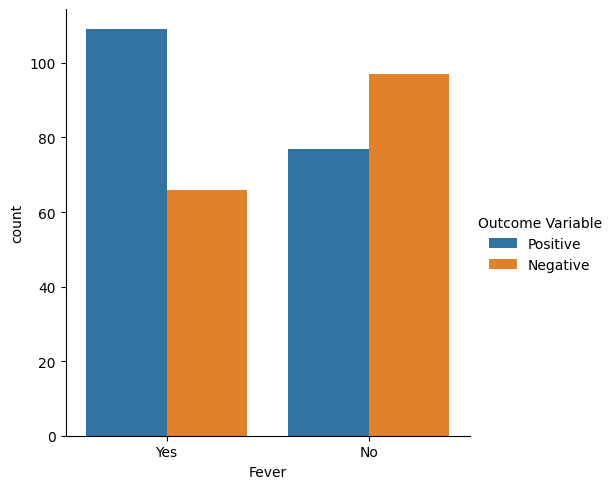

In [15]:
sns.catplot(x='Fever' , kind='count',data=df , hue = "Outcome Variable")

### Having Fever is a major indication of a positive diagnosis

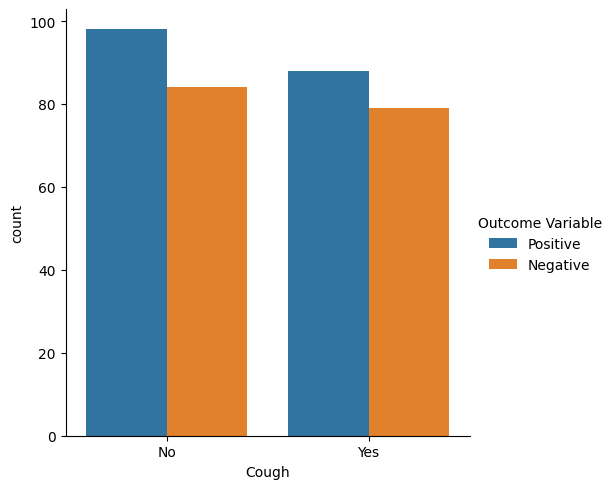

In [16]:
sns.catplot(x='Cough' , kind='count',data=df , hue = "Outcome Variable")

### Nothing major can be inferred from cough as it is quite common

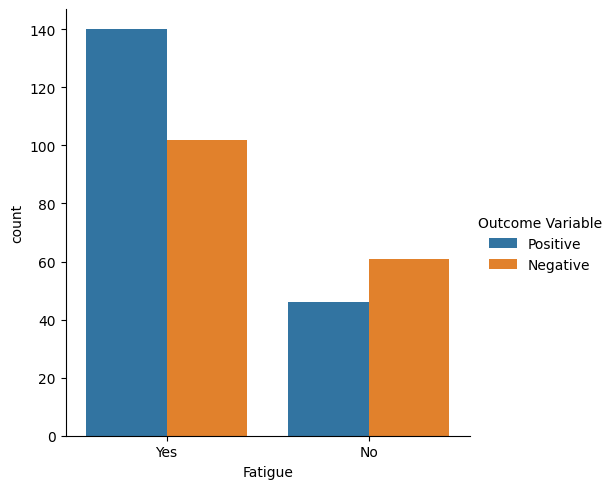

In [17]:
sns.catplot(x='Fatigue' , kind='count',data=df , hue = "Outcome Variable")

### A lot of people irrespective of positive or negative experience a lot of fatique

<Axes: >

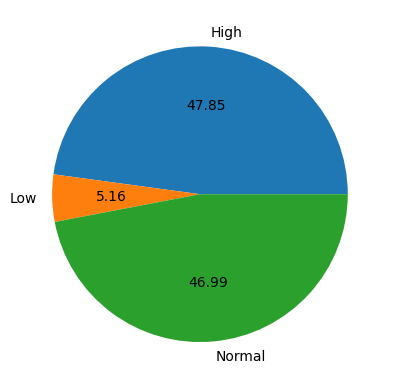

In [18]:
df.groupby('Blood Pressure').size().plot(kind='pie', autopct='%.2f')

### Majority of the subjects have a normal or high blood pressure

<Axes: >

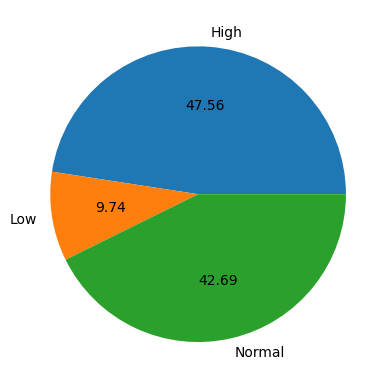

In [19]:
df.groupby('Cholesterol Level').size().plot(kind='pie', autopct='%.2f')

### Majority of the people have high cholestrol and low cholestrol is quite rare

## Classification Model

##### Let's assume the name of disease irrelevant for this case study to see if general disease diagnosis along with classification algorithms can help to detect diseases


In [20]:
#dropping name column
df = df.iloc[:,1:]

In [22]:
df.tail()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Yes,No,Yes,No,80,Female,High,High,Positive
345,Yes,No,Yes,No,85,Male,High,High,Positive
346,Yes,No,Yes,No,85,Male,High,High,Positive
347,Yes,No,Yes,No,90,Female,High,High,Positive
348,Yes,No,Yes,No,90,Female,High,High,Positive


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:8],df.iloc[:,-1],
                                                test_size=0.2)

In [25]:
x_train.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level
165,No,No,Yes,No,45,Male,Normal,Normal
272,Yes,Yes,Yes,Yes,56,Male,High,High
229,No,Yes,No,No,50,Female,High,High
35,Yes,Yes,No,Yes,30,Female,Normal,Normal
310,Yes,No,Yes,No,65,Male,High,Normal


### Encoding Categorical Data

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [27]:
oe = OrdinalEncoder(categories=[['No','Yes']])
x_train_fever = oe.fit_transform(x_train["Fever"].array.reshape(-1, 1))
x_test_fever = oe.transform(x_test["Fever"].array.reshape(-1, 1))

In [38]:
be = OrdinalEncoder(categories=[['No','Yes']])
x_train_cough = be.fit_transform(x_train["Cough"].array.reshape(-1, 1))
x_test_cough = be.transform(x_test["Cough"].array.reshape(-1, 1))

In [39]:
ce = OrdinalEncoder(categories=[['No','Yes']])
x_train_fat = ce.fit_transform(x_train["Fatigue"].array.reshape(-1, 1))
x_test_fat = ce.transform(x_test["Fatigue"].array.reshape(-1, 1))

In [40]:
de = OrdinalEncoder(categories=[['No','Yes']])
x_train_breath = de.fit_transform(x_train["Difficulty Breathing"].array.reshape(-1, 1))
x_test_breath = de.transform(x_test["Difficulty Breathing"].array.reshape(-1, 1))

In [41]:
fe = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_blood = fe.fit_transform(x_train["Blood Pressure"].array.reshape(-1, 1))
x_test_blood = fe.transform(x_test["Blood Pressure"].array.reshape(-1, 1))

In [42]:
ge = OrdinalEncoder(categories=[['Low','Normal',"High"]])
x_train_chol = ge.fit_transform(x_train["Cholesterol Level"].array.reshape(-1, 1))
x_test_chol = ge.transform(x_test["Cholesterol Level"].array.reshape(-1, 1))

In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
x_train_gender = ohe.fit_transform(x_train['Gender'].values.reshape(-1, 1))
x_test_gender = ohe.transform(x_test['Gender'].values.reshape(-1, 1))

In [44]:
x_train_transformed = np.concatenate((x_train_fever,x_train_cough,x_train_fat,x_train_breath,x_train_blood,x_train_chol,x_train_gender),axis=1)

x_test_transformed = np.concatenate((x_test_fever,x_test_cough,x_test_fat,x_test_breath,x_test_blood,x_test_chol,x_test_gender),axis=1)

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [47]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## SVM

In [52]:
# importing library
from sklearn import svm
from sklearn.metrics import accuracy_score


In [53]:
#implementing SVM
sv = svm.SVC()
sv.fit(x_train_transformed,y_train)

SVC()

In [54]:
#predicting values and testing accuracy
spred = sv.predict(x_test_transformed)
accuracy_score(spred,y_test)

0.7571428571428571

## KNN

In [55]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [56]:
#implementing KNN
knn = KNeighborsClassifier()
knn.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [57]:
#predicting values and testing accuracy
kpred = knn.predict(x_test_transformed)
accuracy_score(kpred,y_test)

0.7

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

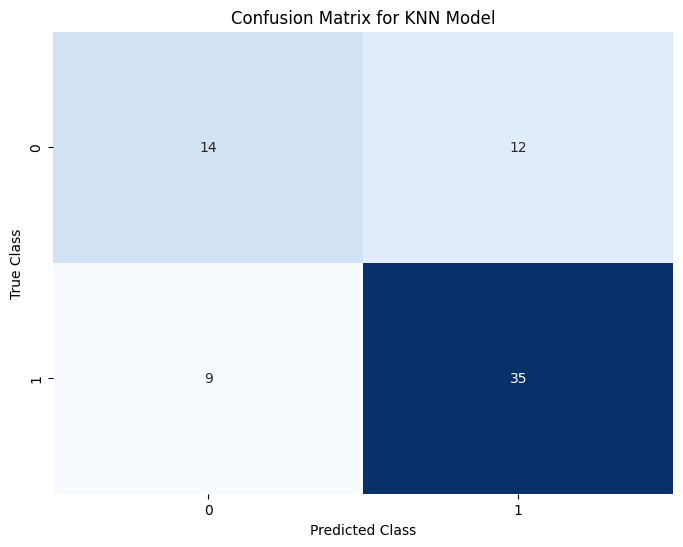

In [63]:
conf_matrix = confusion_matrix(y_test, kpred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix for KNN Model")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### CLASSIFICATION REPORT

In [67]:
print("\nModel Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, kpred))
print("Classification Report:")
print(classification_report(y_test, kpred))



Model Evaluation:
Accuracy Score: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        26
           1       0.74      0.80      0.77        44

    accuracy                           0.70        70
   macro avg       0.68      0.67      0.67        70
weighted avg       0.69      0.70      0.70        70

